In [1]:
import pandas as pd
import numpy as np
import scipy as sp                                                         
import scipy.stats as st
from scipy.stats import sem, t
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import axes
%matplotlib inline
import array
import numpy


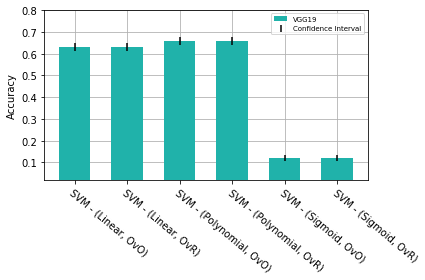

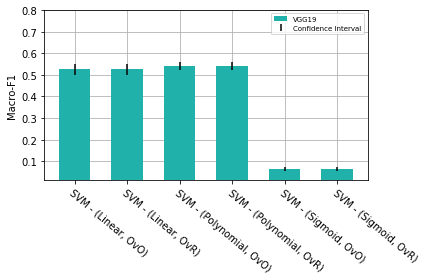

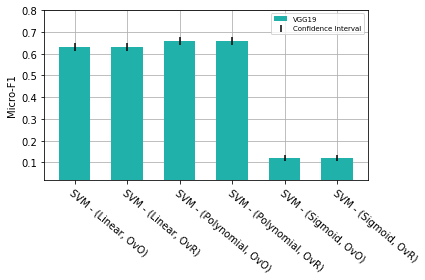

<Figure size 432x288 with 0 Axes>

In [2]:
metricas = ['Accuracy','F1 Macro','F1 Micro']
medidas_pt = ['Accuracy', 'Macro-F1', 'Micro-F1']
errors = ['D.P. - Acurácia','D.P - F1 Macro','D.P - F1 Micro']
i = 0
for metrica in metricas:
    nome_config = []
    medidas_baseori = []
    yerrors = []
    for csv in sorted(glob.glob('*.csv')):
        arquivo = pd.read_csv(csv)
        plantclefori = arquivo.loc[0, metrica]
        dp = arquivo.loc[0, errors[i]]
        nome_config.append(csv[:-4])
        c_interval = st.t.interval(0.95, 9, plantclefori, dp)
        up_lim = c_interval[1]
        down_lim = c_interval[0]
        yerrors.append((up_lim-down_lim)/2)
        medidas_baseori.append(plantclefori)
    
    # Guarda o menor e o maior valor para ajuste automático da escala do gráfico.
    medidas = medidas_baseori
    escala_menor = np.min(medidas) - 0.1
    escala_maior = np.max(medidas) + 0.142
    if metrica == 'F1 Macro':
        escala_menor = np.min(medidas) - 0.05
        escala_maior = np.max(medidas) + 0.262
    
    # Configura a posição das barras
    bar_larg = 0.6
    base1 = np.arange(len(nome_config))+0.6
    base2 = [x + bar_larg for x in base1]
    #plt.xlabel('Classificadores')
    plt.ylabel('%s'%medidas_pt[i])
    plt.grid(zorder=0)
    plt.bar(base1, medidas_baseori, width = bar_larg, label = 'VGG19', color = 'lightseagreen', zorder =3)
    errbar = plt.errorbar(base1, medidas_baseori, yerr= yerrors, label='Confidence Interval', color = 'black', fmt= 'none', zorder=4)    
    plt.xticks([r + bar_larg for r in range(len(nome_config))], nome_config, rotation=-40, ha="left", rotation_mode="anchor")
    plt.ylim([escala_menor, escala_maior]) # Ajusta a escala do gráfico no eixo Y
    plt.legend(fontsize = 'x-small')
    plt.tight_layout()
    plt.savefig(medidas_pt[i]+'.png',dpi=150)
    plt.show()
    plt.clf()
    i = i + 1    